# Confirmed and Active cases Plot for a country affected from Covid-19

Confirmed and Active cases of a country are based on 3 dataset provided by JHU, namely Confirmed cases, Active Cases and Deaths. These countries are affected of SARS Covid-19 (aka Corona virus) outbreak. Each dataset consist of countries and datewise cases. We have calculated Active cases as:

Active = Confirmed - (Recovered + Deaths)

This script fetches the online datasets and parses through them for the required countries and plot them in line-plots format. 2 separate plots are drawn in this script.<br>
One for confirmed cases (shows possibility of flattening the curve). <br>
Second is of Active cases and predicts the doubling time period for past 5 days.

Datasets can be found here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
[Official github link]

Note: Country name being used in code is compulsorily same as in datasets' column *'Country/Region'*

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from matplotlib.dates import DateFormatter
import operator

### Import and Load Dataset

#### Confirmed Cases
In link provided above one can see various datasets in form of comma separated files(csv), we will import for Covid-19 Confirmed cases:
*'time_series_covid19_confirmed_global.csv'*

In [2]:
# Importing the raw csv file

Confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Confirmed_cases.iloc[0:5,:] # Printing the first 5 rows, not using .head() explicitly

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,795,803,820,832,842,850,856,868,872,876
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,748,750,751,751,752,752,754,755,755,758
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,35,35,36,36,36,43,43,45,45,45


#### Deaths
In link provided above one can see various datasets in form of comma separated files(csv), we will import for Deaths due to Covid-19:
 *'time_series_covid19_deaths_global.csv'*

In [3]:
Death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
Death_cases.iloc[0:5,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,85,90,95,104,106,109,115,120,122,127
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,463,465,470,476,483,488,494,502,507,515
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,45,45,46,46,47,47,48,48,48,48
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


#### Recovered Cases
In link provided above one can see various datasets in form of comma separated files(csv), we will import for Covid-19 Recovered cases:
 *'time_series_covid19_recovered_global.csv'*

In [4]:
Recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
Recovered_cases.iloc[0:5,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,345,397,421,458,468,472,502,558,558,610
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,531,543,570,595,605,620,627,650,654,682
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,493,499,514,521,526,537,545,550,550,568
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,11,11,11,11,11,11,13,13,13,13


### Setting Duration with Terminal Dates

All the three datasets have their starting date from index = 4, and the date is 22nd January 2020


In [5]:
# Storing Start and End Date in string format of 'DD M YYYY' (Here M is whole month)

BeginDate = datetime.strptime(Confirmed_cases.columns[4],'%m/%d/%y').strftime("%d %B %Y")
EndDate = datetime.strptime(Confirmed_cases.columns[-1],'%m/%d/%y').strftime("%d %B %Y")
print(BeginDate)
print(EndDate)

22 January 2020
12 May 2020


### Function for Parsing Data

The dataset consist of some countries which are divided into their different Provinces, therefore our first step is to add up all such data. See this example :-

In [6]:
# For example see France raw data
Confirmed_cases.iloc[110:116,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
110,Mayotte,France,-12.8275,45.1662,0,0,0,0,0,0,...,650,686,739,739,854,854,988,1023,1023,1095
111,New Caledonia,France,-20.9043,165.6180,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
112,Reunion,France,-21.1351,55.2471,0,0,0,0,0,0,...,423,424,424,425,427,426,431,436,436,437
113,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,38,38,38,38,38,38,39,39,39,39
115,Martinique,France,14.6415,-61.0242,0,0,0,0,0,0,...,179,181,181,182,183,186,186,186,187,187


#### FetchData Function

*Params*: Country Name, Dataset (one of the 3 datasets can be passed)

*Returns*: Single row of (no. of)cases data of length equal to duration of terminal dates

The function takes care of the (no. of)cases data only and adds up all the rows corresponding to the particular country. There are countries with single row data as well, function takes care of them too.

In [7]:
# Function returns a row of cases(numerical data) related to the dataset passed as a parameter for a particular country

def FetchData(CountryName, Dataset):
       
    CountryRow = [0]*(Dataset.shape[1] - 4)
    
    for i in range(Dataset.shape[0]):
        if Dataset.iloc[i][1] == CountryName:
            for j in range(4,Dataset.shape[1]):
                CountryRow[j-4] += Dataset.iloc[i][j]
                
    return CountryRow

# --- Function Ends Here ---

### Function for creating Country DataFrame

In the next step of data processing, we need a single DataFrame for a single country to list all cases datewise.
By all cases, it means Confirmed cases, Active cases, Recovered cases and Deaths (4 categories).

*Params*: Country Name

*Returns*: Country Dataframe with 4 columns, indexed by dates

In [8]:
# Function returns a Dataframe of the country passed with index = Dates, and 4 columns each related to:-
# 1. Confirmed cases
# 2. Active cases
# 3. Recovered cases
# 4. Deaths
# Function also prints the dataframe

def CountryDataframe(CountryName):
    
    CCdata = FetchData(CountryName, Confirmed_cases)
    DCdata = FetchData(CountryName, Death_cases)
    RCdata = FetchData(CountryName, Recovered_cases)
    ACdata = list(map(operator.sub,CCdata,list(map(operator.add, DCdata, RCdata))))
    
    Dateslist = pd.date_range(BeginDate, EndDate)
    df = pd.DataFrame(list(zip(CCdata, ACdata, RCdata, DCdata)),index = Dateslist, columns = ['Confirmed', 'Active','Recovered','Deaths'])
    print(CountryName)
    print(df)
    return df

# --- Function Ends Here ---

### Function to Plot the Confirmed cases for a single country

*Params*: Name of Country in string format (Single Country Only)

*Returns*: None

Function plots the 300+ cumulative confirmed cases for the given country with respect to dates (x-axis: Dates, y-axis(log scaling): No. of cases). This function also gives predicted values of cases doubling in 3/5/10 days. Final plot is also saved in the same directory as 'png' file.

An exponential growth is given by:
P(t) = P(0) * e^(rt)

where P(t) is current cases, P(0) is initial cases, r = rate of growth, t = no. of days

For doubling rate:
    
 >  2 * P(0) = P(0) * e^(rt)
 
 >  ln(2) = rt
 
 >  0.692/t = r (t = 3, 5 and 10)

In [9]:
# The function takes in the name of the country and plots the confirmed cases data since the country reaches 300+ cases
# The function also plots datalines of prediction if the cases would have doubled every:
# 3 days
# 5 days
# 10 days since the country reached 300 cases

def AnalysisCC(CountryName):
    
    df = CountryDataframe(CountryName)
    
    ConfirmCases_above300 = []
    Dates_above300 = []
    
    for i in range(df.shape[0]):
        if df['Confirmed'][i]>=300:
            ConfirmCases_above300.append(df['Confirmed'][i])
            Dates_above300.append(df.index[i]) 
    
    Above300CC = len(ConfirmCases_above300)
    Cases_double3days = [math.ceil(ConfirmCases_above300[0]*math.exp(i*0.23104)) for i in range(Above300CC)]
    Cases_double5days = [math.ceil(ConfirmCases_above300[0]*math.exp(i*0.13862)) for i in range(Above300CC)]
    Cases_double10days = [math.ceil(ConfirmCases_above300[0]*math.exp(i*0.0693)) for i in range(Above300CC)]
          
    df1 = pd.DataFrame(ConfirmCases_above300,  index= Dates_above300)
    df2 = pd.DataFrame(Cases_double3days,  index= Dates_above300)
    df3 = pd.DataFrame(Cases_double5days,  index= Dates_above300)
    df4 = pd.DataFrame(Cases_double10days,  index= Dates_above300)
    
    ## Begin plotting the graph for daily Confirmed Cases
    fig1, ax1 = plt.subplots(figsize=(13,9))
    
    ## Actual data
    ax1.plot(df1.index.to_pydatetime(), df1.values, color='green', linestyle='dashed', linewidth = 2, marker='o', markerfacecolor='green', markersize=5)
    ax1.plot(df1.index.to_pydatetime()[-1], df1.values[-1], marker='o', markerfacecolor='green', markersize=8)
    Boxtext1 = CountryName + ' :  ' + str(df1.values[-1])
    ax1.text(df1.index.to_pydatetime()[-1] + pd.DateOffset(days=1), df1.values[-1], Boxtext1, color='black', fontsize = 12, bbox=dict(facecolor='white', edgecolor= 'green', boxstyle='round'))
    
    ## Cases double every 3 days
    ax1.plot(df2.index.to_pydatetime(), df2.values, color='red', linestyle='dashed', linewidth = 1)
    ax1.plot(df2.index.to_pydatetime()[-1], df2.values[-1], marker='o', markerfacecolor='red', markersize=8, label = 'Cases double every 3 days')
    
    ax1.text(df2.index.to_pydatetime()[-1] + pd.DateOffset(days=1), df2.values[-1], str(df2.values[-1]), color='black', fontsize = 10, bbox=dict(facecolor='white', edgecolor= 'red', boxstyle='round'))
    
    ## Cases double every 5 days
    ax1.plot(df3.index.to_pydatetime(), df3.values, color='blue', linestyle='dashed', linewidth = 1)
    ax1.plot(df3.index.to_pydatetime()[-1], df3.values[-1], marker='o', markerfacecolor='blue', markersize=8, label = 'Cases double every 5 days')
    
    ax1.text(df3.index.to_pydatetime()[-1] + pd.DateOffset(days=1), df3.values[-1], str(df3.values[-1]), color='black', fontsize = 10, bbox=dict(facecolor='white', edgecolor= 'blue', boxstyle='round'))
    
    ## Cases double every 10 days
    ax1.plot(df4.index.to_pydatetime(), df4.values, color='black', linestyle='dashed', linewidth = 1)
    ax1.plot(df4.index.to_pydatetime()[-1], df4.values[-1], marker='o', markerfacecolor='black', markersize=8, label = 'Cases double every 10 days')
    
    ax1.text(df4.index.to_pydatetime()[-1] + pd.DateOffset(days=1), df4.values[-1], str(df4.values[-1]), color='black', fontsize = 10, bbox=dict(facecolor='white', edgecolor= 'black', boxstyle='round'))

    ## Formatting the graph
    
    ax1.set_yscale('log')
    ax1.grid(axis = 'y')
    
    myFmt = DateFormatter("%d-%b")
    ax1.xaxis.set_major_formatter(myFmt)
    
    yticklist = [100, 250, 500, 1000]
    for i in range(df2.shape[0]):
        a = int(yticklist[-1]*2)
        if a < df2.values[-1]/2:
            yticklist.append(a)

    
    ax1.set_yticks(yticklist)
    ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax1.get_yaxis().set_tick_params(which='minor', size=0)
    ax1.get_yaxis().set_tick_params(which='minor', width=0)
    
    ax1.set_xlabel('Date (Since 300 cases)', fontsize = 12)
    ax1.set_ylabel('Number of Cases (Log scaling)', fontsize = 12) 
    ax1.set_title('Covid-19 Confirmed Cases in '+ CountryName + ' as of ' + EndDate, fontsize = 15)
    ax1.legend(fontsize = 11, loc='upper center', ncol = 3, frameon = False)
    
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    plt.savefig('CountryConfirmedcases.png')
    
    # --- Function Ends Here----


### Finally the Plot

The plot is preceded by dataframe of the countriy passed. Also check image of the plot, saved in your system.

India
            Confirmed  Active  Recovered  Deaths
2020-01-22          0       0          0       0
2020-01-23          0       0          0       0
2020-01-24          0       0          0       0
2020-01-25          0       0          0       0
2020-01-26          0       0          0       0
...               ...     ...        ...     ...
2020-05-08      59695   39823      17887    1985
2020-05-09      62808   41406      19301    2101
2020-05-10      67161   43980      20969    2212
2020-05-11      70768   45925      22549    2294
2020-05-12      74292   47457      24420    2415

[112 rows x 4 columns]


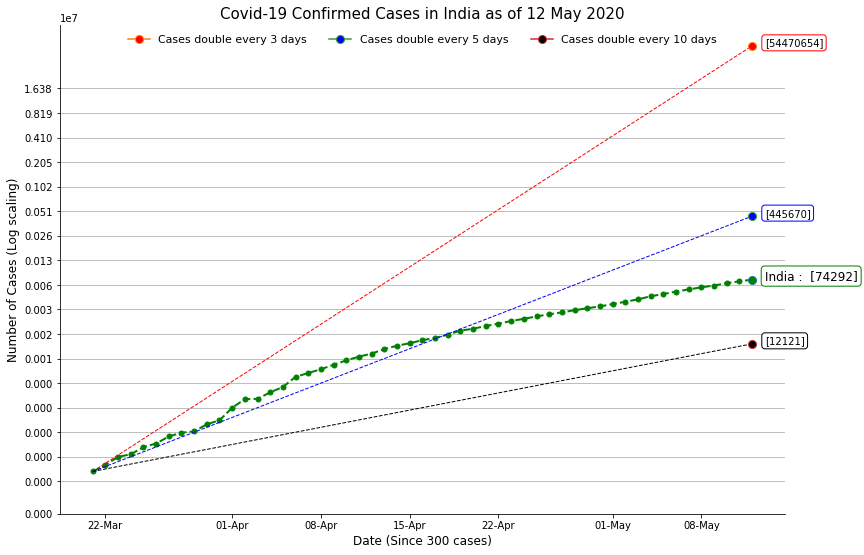

In [10]:
AnalysisCC('India') # One can change 'India' to any country in the dataset

### Function to Plot the Active cases for a single country

*Params*: Name of Country in string format (Single Country Only)

*Returns*: None

Function plots the 300+ cumulative Active cases for the given country with respect to dates (x-axis: Dates, y-axis: No. of cases). Active cases not just tell how the disease is spreading but also tells how much is the recovery and fatality. This function also gives predicted values of recent(last 5 days) doubling time. Final plot is also saved in the same directory as 'png' file.

An exponential growth is given by:
P(t) = P(0) * e^(rt)

where P(t) is current cases, P(0) is initial cases, r = rate of growth, t = no. of days

For rate calculation for past 5 days:
    
    > P(t) = P(t-5) * e^(r*5)

Once we have the rate then we can calculate the doubling period:
    
    > ln(2) = rt

       

In [11]:
# The function takes in the name of the country and plot the active cases data since the country got its 300+ active cases
# The function also predicts the growth rate of the active cases for past 5 days
# It also provides the doubling period of the pandemic spread 

def AnalysisAC(CountrName):
    
    df = CountryDataframe(CountrName)
    PbyP0 = df['Active'][-1] / df['Active'][-6] 
    GrowthRate = (math.log(PbyP0)/5) 
    Doubling_days = math.log(2)/GrowthRate
    GrowthRate = math.floor(GrowthRate * 10000)
    
    ActiveCases_above300 = []
    Dates_above300 = []
    
    for i in range(df.shape[0]):
        if df['Active'][i]>=300:
            ActiveCases_above300.append(df['Active'][i])
            Dates_above300.append(df.index[i])
            
    df1 = pd.DataFrame(ActiveCases_above300, index=Dates_above300)
    
    fig2, ax2 = plt.subplots(figsize=(13,9))
    
    ax2.plot(df1.index.to_pydatetime(), df1.values, 'ro', markersize = 11)
    ax2.plot(df1.index.to_pydatetime()[-1], df1.values[-1], 'go', markersize = 13)
    Boxtext1 = CountrName + ' :  ' + str(df1.values[-1]) 
    ax2.text(df1.index.to_pydatetime()[-1] + pd.DateOffset(days=1), df1.values[-1], Boxtext1, color='black', fontsize = 12, bbox=dict(facecolor='white', edgecolor= 'green', boxstyle='round'))
    
    
    # Formatting the graph
    
    ax2.grid(axis = 'y')
    
    myFmt = DateFormatter("%d-%b")
    ax2.xaxis.set_major_formatter(myFmt)
    
    if GrowthRate > 0:
        Str1 = 'Growth Rate in last 5 days is ' + str(GrowthRate/100) + '%'
        Str2 = '(Cases double in ~every ' + str(round(Doubling_days)) + ' days)'
        ax2.text(df1.index.to_pydatetime()[2], df1.values[-5], Str1, fontsize = 13)
        ax2.text(df1.index.to_pydatetime()[2], df1.values[-6], Str2, fontsize = 13)
    else:
        Str1 = 'Growth Rate is negative, War is Won'
        ax2.text(df1.index.to_pydatetime()[2], df1.values[-5], Str1, fontsize = 13)
    
    ax2.set_xlabel('Date (Since 300 cases)', fontsize = 12)
    ax2.set_ylabel('Number of Cases', fontsize = 12)
    ax2.set_title('Covid-19 Active Cases in '+ CountrName + ' as on ' + EndDate, fontsize = 15)
    
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    plt.savefig('CountryActiveCases.png')
    # --- Function Ends Here ---


### Finally the Plot

The plot is preceded by dataframe of the country passed. Also check image of the plot, saved in your system.

India
            Confirmed  Active  Recovered  Deaths
2020-01-22          0       0          0       0
2020-01-23          0       0          0       0
2020-01-24          0       0          0       0
2020-01-25          0       0          0       0
2020-01-26          0       0          0       0
...               ...     ...        ...     ...
2020-05-08      59695   39823      17887    1985
2020-05-09      62808   41406      19301    2101
2020-05-10      67161   43980      20969    2212
2020-05-11      70768   45925      22549    2294
2020-05-12      74292   47457      24420    2415

[112 rows x 4 columns]


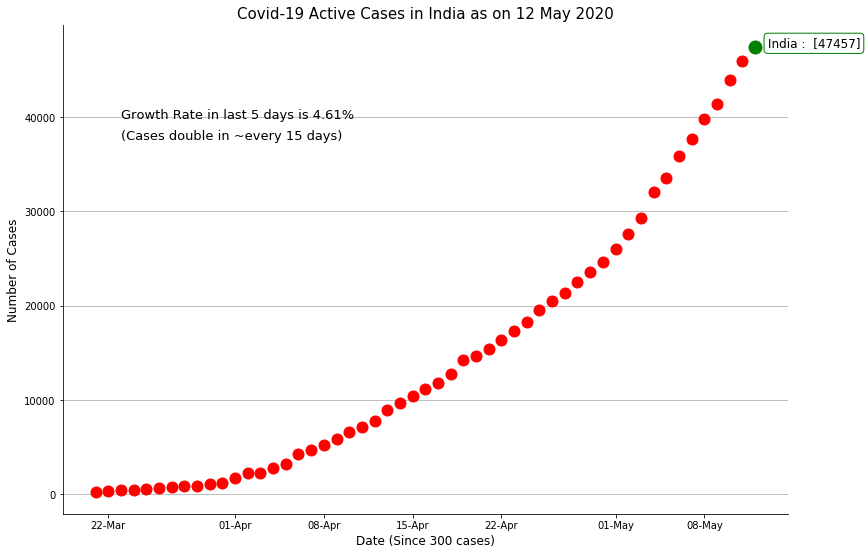

In [12]:
AnalysisAC('India') # One can change 'India' to any country in the dataset